## Importando as bibliotecas

In [1]:
import zipfile 
import pandas as pd
import matplotlib.pyplot as plt

## Importando os arquivos

### Descobrindo os arquivos que há dentro do zip

In [2]:
with zipfile.ZipFile('archive.zip') as z:
    print(*z.namelist(), sep="\n")

players_15.csv
players_16.csv
players_17.csv
players_18.csv
players_19.csv
players_20.csv
teams_and_leagues.csv


### Criando uma function para abrir os arquivos do zip

In [3]:
def desc_zipfile(name_zip, name_csv):
    """Function que faz a leitura do arquivo dentro do zip e cria um DataFrame
    name_zip = caminho do arquivo zip
    name_csv = nome do arquivo que precisará abrir dentro do zip
    """
    with zipfile.ZipFile(name_zip) as z:
        with z.open(name_csv) as v:
            name_df = pd.read_csv(v)
            return name_df

## Análise Exploratória dos dados

In [4]:
players_20 = desc_zipfile('archive.zip', 'players_20.csv')

players_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


#### Tamanho do arquivo

In [5]:
players_20.shape

(18278, 104)

#### Nome das colunas do arquivo

In [6]:
columns = players_20.columns.values
print(columns)

['sofifa_id' 'player_url' 'short_name' 'long_name' 'age' 'dob' 'height_cm'
 'weight_kg' 'nationality' 'club' 'overall' 'potential' 'value_eur'
 'wage_eur' 'player_positions' 'preferred_foot' 'international_reputation'
 'weak_foot' 'skill_moves' 'work_rate' 'body_type' 'real_face'
 'release_clause_eur' 'player_tags' 'team_position' 'team_jersey_number'
 'loaned_from' 'joined' 'contract_valid_until' 'nation_position'
 'nation_jersey_number' 'pace' 'shooting' 'passing' 'dribbling'
 'defending' 'physic' 'gk_diving' 'gk_handling' 'gk_kicking' 'gk_reflexes'
 'gk_speed' 'gk_positioning' 'player_traits' 'attacking_crossing'
 'attacking_finishing' 'attacking_heading_accuracy'
 'attacking_short_passing' 'attacking_volleys' 'skill_dribbling'
 'skill_curve' 'skill_fk_accuracy' 'skill_long_passing'
 'skill_ball_control' 'movement_acceleration' 'movement_sprint_speed'
 'movement_agility' 'movement_reactions' 'movement_balance'
 'power_shot_power' 'power_jumping' 'power_stamina' 'power_strength'
 'po

#### Tipo de dado para cada coluna

In [7]:
players_20.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

#### Dados estatísticos básicos do dataset

In [8]:
players_20.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


#### Análise exploratório de dados nulos

In [9]:
for col in columns:
    if players_20[col].isnull().sum() == 0:
        pass
    else:
        print('Nome da coluna: {} \nTotal de Valores Nulos:{}'.format(col,players_20[col].isnull().sum()))
        print(50*'-')

Nome da coluna: release_clause_eur 
Total de Valores Nulos:1298
--------------------------------------------------
Nome da coluna: player_tags 
Total de Valores Nulos:16779
--------------------------------------------------
Nome da coluna: team_position 
Total de Valores Nulos:240
--------------------------------------------------
Nome da coluna: team_jersey_number 
Total de Valores Nulos:240
--------------------------------------------------
Nome da coluna: loaned_from 
Total de Valores Nulos:17230
--------------------------------------------------
Nome da coluna: joined 
Total de Valores Nulos:1288
--------------------------------------------------
Nome da coluna: contract_valid_until 
Total de Valores Nulos:240
--------------------------------------------------
Nome da coluna: nation_position 
Total de Valores Nulos:17152
--------------------------------------------------
Nome da coluna: nation_jersey_number 
Total de Valores Nulos:17152
---------------------------------------------

### Apos a análise exploratória, irei retirar as colunas que:

#### 1. Possuem grande quantidade de valores nulos e podem atrapalhar as análises
#### 2. Não possuem relevância para as análises

In [10]:
players_20_n = players_20[['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 
                           'value_eur', 'wage_eur', 'player_positions', 'power_jumping', 'power_long_shots'
                          ]]

In [11]:
players_20_n.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,power_jumping,power_long_shots
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",68,94
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",95,93
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",61,84
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,78,12
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",56,80


### Análise exploratória dos times Barcela vs Real Madrid

In [12]:
realmadrid = players_20_n[players_20_n["club"] == "Real Madrid"]
realmadrid.shape

(33, 13)

In [13]:
barcelona = players_20_n[players_20_n["club"] == "FC Barcelona"]
barcelona.shape

(33, 13)

#### Análise dos melhores jogadores

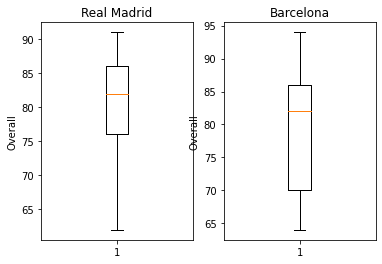

In [21]:
plt.figure()

plt.subplot(121)
plt.boxplot(realmadrid['overall'])
plt.ylabel('Overall')
plt.title('Real Madrid')
plt.grid(False)

plt.subplot(122)
plt.boxplot(barcelona['overall'])
plt.ylabel('Overall')
plt.title('Barcelona')
plt.grid(False)


In [25]:
print(realmadrid['overall'].describe())
print(50*'-')
print(barcelona['overall'].describe())

count    33.000000
mean     80.121212
std       7.975578
min      62.000000
25%      76.000000
50%      82.000000
75%      86.000000
max      91.000000
Name: overall, dtype: float64
--------------------------------------------------
count    33.000000
mean     78.363636
std       9.370226
min      64.000000
25%      70.000000
50%      82.000000
75%      86.000000
max      94.000000
Name: overall, dtype: float64


A classificação dos jogadores de Barcelona está mais dispersa do que o Real Madrid, isso quer dizer que:
A variação que tem enquanto a classificação de jogadores está mais concentrada do que o Barcelona

### Análise exploratória dos jogadores mais valorizados

Text(0.5, 1.0, 'Valor em 10x8 de milhões de euros - Real Madrid')

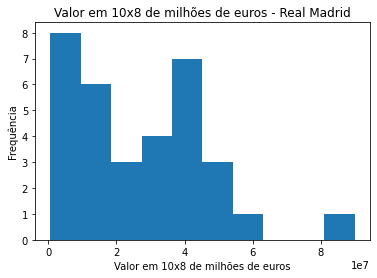

In [35]:
plt.hist(realmadrid['value_eur'])
plt.xlabel('Valor em 10x8 de milhões de euros')
plt.ylabel('Frequência')
plt.title('Valor em 10x8 de milhões de euros - Real Madrid')

In [38]:
realmadrid['value_eur'].describe()

count    3.300000e+01
mean     2.720758e+07
std      2.063137e+07
min      5.500000e+05
25%      1.300000e+07
50%      2.300000e+07
75%      4.050000e+07
max      9.000000e+07
Name: value_eur, dtype: float64

In [41]:
most_value_rm = realmadrid[realmadrid['value_eur'] > 50000000]
most_value_rm

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,power_jumping,power_long_shots
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",56,80
36,T. Kroos,29,183,76,Germany,Real Madrid,88,88,57000000,330000,CM,30,86
42,Casemiro,27,185,84,Brazil,Real Madrid,87,89,53500000,240000,CDM,87,81
62,Isco,27,176,79,Spain,Real Madrid,86,87,51000000,245000,"CAM, CM, LW",61,84


A média de valores dos jogadores do Real Madrid é de 272.0 milhões de euros

O jogador mais caro possui o valor de 900.0 milhões de euros

O jogador mais barato possui o valor de 5.5 milhões de euros

Há uma distribuição bem acentuada ente os ranges de 0 - 4

Text(0.5, 1.0, 'Valor em 10x8 de milhões de euros - Barcelona')

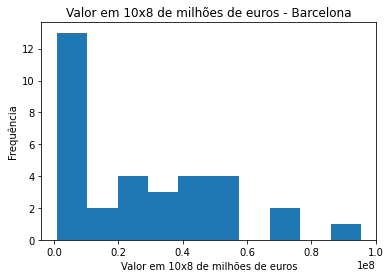

In [36]:
plt.hist(barcelona['value_eur'])
plt.xlabel('Valor em 10x8 de milhões de euros')
plt.ylabel('Frequência')
plt.title('Valor em 10x8 de milhões de euros - Barcelona')

In [39]:
barcelona['value_eur'].describe()

count    3.300000e+01
mean     2.634242e+07
std      2.513480e+07
min      8.500000e+05
25%      3.100000e+06
50%      2.200000e+07
75%      4.250000e+07
max      9.550000e+07
Name: value_eur, dtype: float64

In [42]:
most_value_b = barcelona[barcelona['value_eur'] > 50000000]
most_value_b

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,power_jumping,power_long_shots
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",68,94
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,79,10
19,L. Suárez,32,182,86,Uruguay,FC Barcelona,89,89,53000000,355000,ST,69,86
21,Sergio Busquets,30,189,76,Spain,FC Barcelona,89,89,55000000,300000,"CDM, CM",66,54
22,A. Griezmann,28,176,73,France,FC Barcelona,89,89,69000000,370000,"CF, ST, LW",89,83
75,F. de Jong,22,180,74,Netherlands,FC Barcelona,85,91,52000000,195000,"CM, CDM",76,62


A média de valores dos jogadores do Barcelona é de 263.4 milhões de euros

O jogador mais caro possui o valor de 955.0 milhões de euros

O jogador mais barato possui o valor de 8.5 milhões de euros

Há uma distribuição bem acentuada ente no range de 0.0 e 0.1

### Relação de dados e valorização em 10x8 milhões de euros

<AxesSubplot:xlabel='age', ylabel='value_eur'>

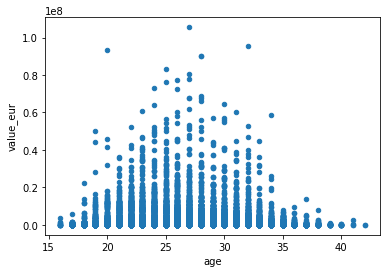

In [43]:
players_20_n.plot(kind='scatter', x='age', y='value_eur')

Esse gráfico demonstra que temos uma relação entre a idade dos jogadores e o valor que possuem no mercado

Jogadores entre 20-30 anos possuem uma grande probabilidade de estarem com um valor maior no mercado, a partir dos 35 anos os seus valores já caem consideravelmente e há probabilidades quase nulas de estarem com um valor alto no mercado

#### Jogadores mais valiosos do mundo

In [49]:
most_value_world = players_20_n[players_20_n['value_eur'] > 80000000]
most_value_world

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,power_jumping,power_long_shots
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",68,94
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",61,84
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",56,80
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,"CAM, CM",63,90
9,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,240000,"RW, ST",69,84
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,"ST, RW",76,79
12,H. Kane,25,188,89,England,Tottenham Hotspur,89,91,83000000,220000,ST,79,86


In [48]:
most_value_world.shape

(7, 13)

### Análise exploratória dos clubes que contém os melhores salários entre Real Madrid e Barcelona

In [51]:
realmadrid['wage_eur'].describe()

count        33.000000
mean     162242.424242
std      111794.462716
min        6000.000000
25%       60000.000000
50%      165000.000000
75%      235000.000000
max      470000.000000
Name: wage_eur, dtype: float64

In [53]:
barcelona['wage_eur'].describe()

count        33.000000
mean     150000.000000
std      130914.810087
min       12000.000000
25%       29000.000000
50%      155000.000000
75%      210000.000000
max      565000.000000
Name: wage_eur, dtype: float64

In [54]:
best_wage_rm = realmadrid[realmadrid['wage_eur'] > 300000]
best_wage_rm

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,power_jumping,power_long_shots
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",56,80
8,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,340000,CM,68,82
36,T. Kroos,29,183,76,Germany,Real Madrid,88,88,57000000,330000,CM,30,86


In [55]:
best_wage_b = barcelona[barcelona['wage_eur'] > 300000]
best_wage_b

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,power_jumping,power_long_shots
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",68,94
19,L. Suárez,32,182,86,Uruguay,FC Barcelona,89,89,53000000,355000,ST,69,86
22,A. Griezmann,28,176,73,France,FC Barcelona,89,89,69000000,370000,"CF, ST, LW",89,83


Os salários do clube Real Madrid, de forma geral, está acima da média em relação ao Barcelona, porém o Barcelona possui o jogador mais caro entre eles